In [1]:
import pandas as pd
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
# Importing the data.
df = pd.read_csv('Stock_data.csv')
df.head()

,Date,Stock,Open,High,Low,Close,Volume
0,2019-08-07,MVST,9.868,9.95,9.84,9.950,3600
1,2019-08-08,MVST,9.868,9.95,9.84,9.950,100
2,2019-08-09,MVST,9.840,9.92,9.83,9.900,2800
3,2019-08-12,MVST,9.831,9.94,9.80,9.849,10300
4,2019-08-13,MVST,9.840,9.90,9.84,9.849,652700


In [3]:
# Setting the 'Date' column as index.
df.set_index('Date', inplace = True)
df.head()

,Stock,Open,High,Low,Close,Volume
Date,,,,,,
2019-08-07,MVST,9.868,9.95,9.84,9.950,3600
2019-08-08,MVST,9.868,9.95,9.84,9.950,100
2019-08-09,MVST,9.840,9.92,9.83,9.900,2800
2019-08-12,MVST,9.831,9.94,9.80,9.849,10300
2019-08-13,MVST,9.840,9.90,9.84,9.849,652700


In [4]:
df.shape

(483, 6)

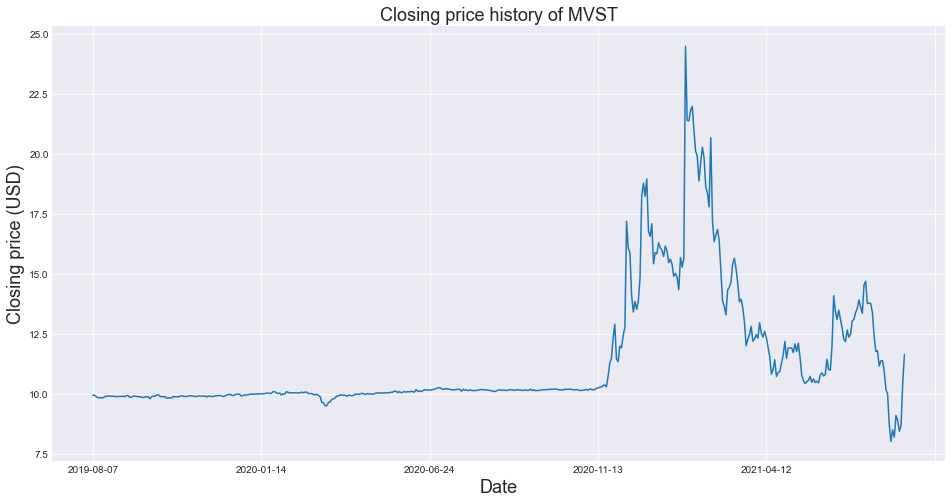

In [5]:
# Visualising the closing price history.
df['Close'].plot(figsize = (16,8))
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing price (USD)', fontsize = 18)
plt.title('Closing price history of '+ df['Stock'][0], fontsize = 18)
plt.show()

In [6]:
# Creating a dataframe with only the 'Close' column.
data = df.filter(['Close'])
data.head()

,Close
Date,
2019-08-07,9.950
2019-08-08,9.950
2019-08-09,9.900
2019-08-12,9.849
2019-08-13,9.849


In [7]:
# Creating the dataframe to a numpy array.
dataset = data.values
dataset

array([[ 9.94999981],
       [ 9.94999981],
       [ 9.89999962],
       [ 9.84899998],
       [ 9.84899998],
       [ 9.84899998],
       [ 9.84000015],
       [ 9.88599968],
       [ 9.90999985],
       [ 9.90999985],
       [ 9.92000008],
       [ 9.90999985],
       [ 9.90999985],
       [ 9.89999962],
       [ 9.89099979],
       [ 9.89999962],
       [ 9.89999962],
       [ 9.89999962],
       [ 9.90999985],
       [ 9.89000034],
       [ 9.93500042],
       [ 9.93500042],
       [ 9.85999966],
       [ 9.86999989],
       [ 9.90999985],
       [ 9.90999985],
       [ 9.89999962],
       [ 9.89000034],
       [ 9.88000011],
       [ 9.88000011],
       [ 9.85000038],
       [ 9.88000011],
       [ 9.88000011],
       [ 9.89000034],
       [ 9.80000019],
       [ 9.89000034],
       [ 9.90999985],
       [ 9.89999962],
       [ 9.96500015],
       [ 9.97000027],
       [ 9.89999962],
       [ 9.89000034],
       [ 9.89000034],
       [ 9.89000034],
       [ 9.81999969],
       [ 9

In [8]:
# Number of rows to train the model on.
training_data_length = math.ceil(len(dataset) * 0.8)
training_data_length

387

In [9]:
# Feature scaling.
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.11711161],
       [0.11711161],
       [0.11407762],
       [0.11098298],
       [0.11098298],
       [0.11098298],
       [0.11043688],
       [0.11322811],
       [0.11468443],
       [0.11468443],
       [0.11529124],
       [0.11468443],
       [0.11468443],
       [0.11407762],
       [0.11353152],
       [0.11407762],
       [0.11407762],
       [0.11407762],
       [0.11468443],
       [0.11347087],
       [0.11620146],
       [0.11620146],
       [0.11165044],
       [0.11225725],
       [0.11468443],
       [0.11468443],
       [0.11407762],
       [0.11347087],
       [0.11286406],
       [0.11286406],
       [0.11104369],
       [0.11286406],
       [0.11286406],
       [0.11347087],
       [0.1080097 ],
       [0.11347087],
       [0.11468443],
       [0.11407762],
       [0.11802183],
       [0.11832523],
       [0.11407762],
       [0.11347087],
       [0.11347087],
       [0.11347087],
       [0.10922326],
       [0.11043688],
       [0.11043688],
       [0.110

In [10]:
# Training dataset.
train_data = scaled_data[0:training_data_length, :]
# Splitting the dataset into x_train and y_train.
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [11]:
# Converting the x_train and y_train to numpy arrays for LSTM model.
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshaping the data because LSTM expects 3D input (Number of samples, Number of timesteps, Number of features).
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(327, 60, 1)

In [13]:
# LSTM model.
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [14]:
# Model compilation.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
# Training the model.
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

327/327 [==============================] - 31s 27ms/step - loss: 0.0082


In [16]:
# Testing dataset.
test_data = scaled_data[training_data_length - 60:, :]
x_test = []
y_test = dataset[training_data_length:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [17]:
# Converting the test data to numpy array.
x_test = np.array(x_test)

In [18]:
# Reshaping the data.
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
# Predicted price values.
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
# Model evaluation (RMSE).
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

1.5274627719522067

C:\Users\dneil\AppData\Local\Temp/ipykernel_12524/2492622941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


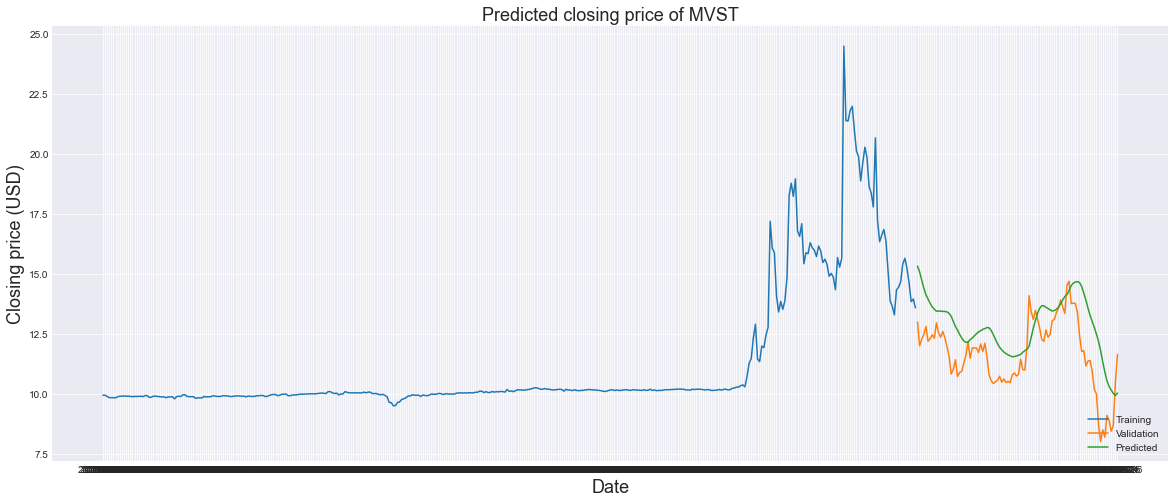

In [21]:
# Plot.
train = data[:training_data_length]
validation = data[training_data_length:]
validation['Predictions'] = predictions

plt.figure(figsize = (20,8))
plt.plot(train['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing price (USD)', fontsize = 18)
plt.title('Predicted closing price of '+ df['Stock'][0], fontsize = 18)
plt.legend(['Training', 'Validation', 'Predicted'], loc = 'lower right')
plt.show()

In [22]:
validation

,Close,Predictions
Date,,
2021-03-23,13.00,15.327917
2021-03-24,12.01,15.089907
2021-03-25,12.29,14.745738
2021-03-26,12.48,14.413982
2021-03-29,12.82,14.140269
...,...,...
2021-08-02,8.90,10.320391
2021-08-03,8.45,10.168451
2021-08-04,8.68,10.030519
